In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
 

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/dataset.zip
   creating: dataset/
   creating: dataset/test/
   creating: dataset/test/alpaca/
  inflating: dataset/test/alpaca/d0b4c8cd3cb8be00.jpg  
  inflating: dataset/test/alpaca/d7e473f9ad96c863.jpg  
  inflating: dataset/test/alpaca/d051c768bf8e8b44.jpg  
  inflating: dataset/test/alpaca/da53a365b9dc1714.jpg  
  inflating: dataset/test/alpaca/daa523b3df824223.jpg  
  inflating: dataset/test/alpaca/daf7678f279e0da6.jpg  
  inflating: dataset/test/alpaca/dba1c7055fdfd66a.jpg  
  inflating: dataset/test/alpaca/dc19818da511769e.jpg  
  inflating: dataset/test/alpaca/dd540f697b77bb63.jpg  
  inflating: dataset/test/alpaca/e9a2edc24c4ae2fb.jpg  
  inflating: dataset/test/alpaca/e36f3a6048e3f629.jpg  
  inflating: dataset/test/alpaca/e50cb09f2b4fdf1f.jpg  
  inflating: dataset/test/alpaca/e89e4b8eaf43e06a.jpg  
  inflating: dataset/test/alpaca/e367def0ed1a5dd1.jpg  
  inflating: dataset/test/alpaca/e370a55e3f1b09ed.jpg  
  inflating: dat

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2)

test_datagen = ImageDataGenerator (rescale = 1./255)

training_set = train_datagen.flow_from_directory ('/content/dataset/train',
target_size = (64,64),
batch_size = 32,
class_mode = 'binary')


test_set = test_datagen.flow_from_directory ('/content/dataset/test',
target_size = (64,64),
batch_size = 32,
class_mode = 'binary')

Found 492 images belonging to 3 classes.
Found 117 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.experimental.preprocessing.Resizing(64,64, interpolation= 'bilinear'),
tf.keras.layers.Conv2D(6,(6,6),activation='relu',input_shape=(64,64,3)),
tf.keras.layers.Conv2D(12,(5,5), strides=(2,2),activation='relu'),
tf.keras.layers.Conv2D(24,(4,4), strides=(2,2),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(rate=.25),
tf.keras.layers.Dense(200, activation='relu'),
tf.keras.layers.Dense(3,activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(decay=.0001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Entrenamos el modelo

In [ ]:
model.fit(training_set,epochs=25)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/25
16/16 [==============================] - 11s 596ms/step - loss: 1.0235 - accuracy: 0.5285
Epoch 2/25
16/16 [==============================] - 10s 631ms/step - loss: 0.8316 - accuracy: 0.6199
Epoch 3/25
16/16 [==============================] - 10s 608ms/step - loss: 0.8464 - accuracy: 0.6077
Epoch 4/25
16/16 [==============================] - 10s 585ms/step - loss: 0.7811 - accuracy: 0.6687
Epoch 5/25
16/16 [==============================] - 10s 637ms/step - loss: 0.7184 - accuracy: 0.6992
Epoch 6/25
16/16 [==============================] - 10s 601ms/step - loss: 0.6885 - accuracy: 0.7134
Epoch 7/25
16/16 [==============================] - 10s 605ms/step - loss: 0.6554 - accuracy: 0.7195
Epoch 8/25
16/16 [==============================] - 10s 639ms/step - loss: 0.6023 - accuracy: 0.7480
Epoch 9/25
16/16 [==============================] - 10s 633ms/step - loss: 0.5457 - accuracy: 0.7866
Epoch 10/25
16/16 [==============================] - 10s 633ms/step - loss: 0.5220 - accura

In [ ]:
model.evaluate(test_set)

2/4 [==============>...............] - ETA: 1s - loss: 2.2431 - accuracy: 0.6094

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 2s 430ms/step - loss: 1.9431 - accuracy: 0.6581


[1.9431140422821045, 0.6581196784973145]

Evaluamos sobre algunas imagenes de testindividuales

In [ ]:
b = test_set.next()
print (b[1][0:5]) #Imprimo las etiquetas verdaderas
model.predict(b[0][0:5]) #Calculo las probabilidades con el modelo

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0. 2. 0. 0. 1.]


array([[8.5461491e-01, 1.2331865e-01, 2.2066381e-02],
       [1.0203245e-01, 1.2259497e-04, 8.9784491e-01],
       [4.4970644e-08, 9.9999952e-01, 4.6616006e-07],
       [2.2820969e-01, 1.5421787e-01, 6.1757237e-01],
       [3.3563906e-01, 6.5231055e-01, 1.2050414e-02]], dtype=float32)

(1, 500, 500, 3)
*****************************
[[0. 0. 1.]]
sheep


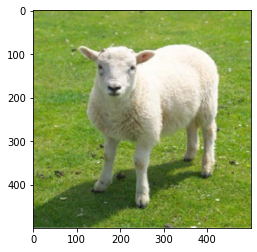

In [ ]:
import PIL
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/imagen5.jpg', target_size = (500, 500))


plt.imshow(test_image)

test_image = (np.expand_dims(test_image,0))

print(test_image.shape)


predictions_single = model.predict(test_image)
print("*****************************")
print(predictions_single)

if predictions_single[0] [0] > 0.95:
    prediction = 'alpaca'
if predictions_single [0] [1] > 0.95:
   prediction = 'cow'
if predictions_single [0] [2] > 0.95:
   prediction = 'sheep'
print(prediction)